# BaseBall Case Study

Problem Statement:
    This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Output: Number of predicted wins (W)

In [1]:
import pandas as pd
import numpy as np

In [4]:
url='https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv'
df=pd.read_csv(url)
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [5]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [7]:
df.isnull().sum()


W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [8]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# Checking datatypes

In [9]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [10]:
df['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79])

In [11]:
df.loc[df['W']==' ']  # to check if there is any space in that column

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


# Making Dataframe for ordinal data

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


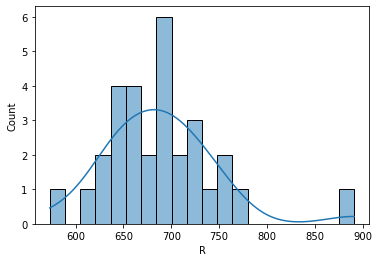

In [55]:
sns.histplot(x='R',data=df,bins=20,kde=True)
plt.show()

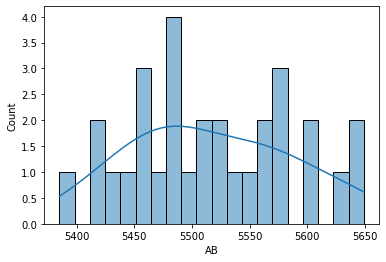

In [54]:
sns.histplot(x='AB',data=df,bins=20,kde=True)
plt.show()

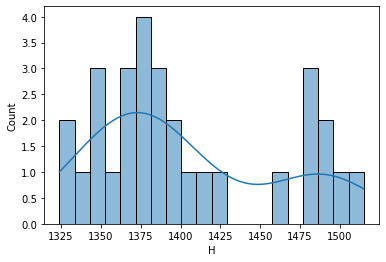

In [53]:
sns.histplot(x='H',data=df,bins=20,kde=True)
plt.show()

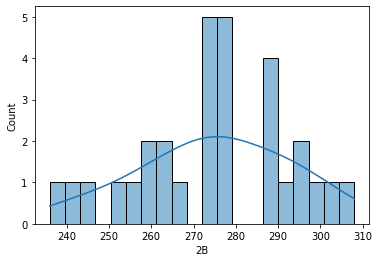

In [52]:
sns.histplot(x='2B',data=df,bins=20,kde=True)
plt.show()

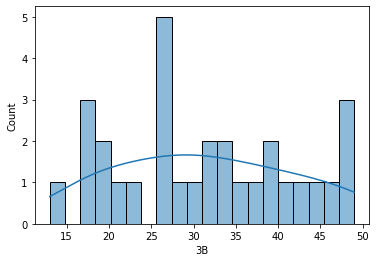

In [51]:
sns.histplot(x='3B',data=df,bins=20,kde=True)
plt.show()

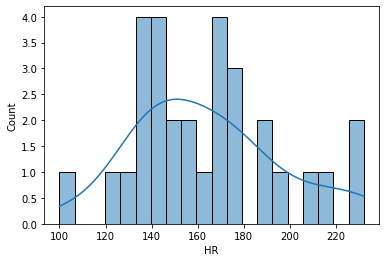

In [50]:
sns.histplot(x='HR',data=df,bins=20,kde=True)
plt.show()

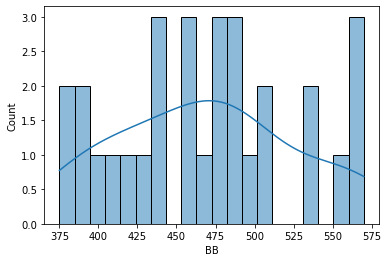

In [49]:
sns.histplot(x='BB',data=df,bins=20,kde=True)
plt.show()

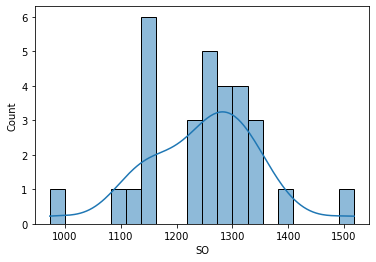

In [48]:
sns.histplot(x='SO',data=df,bins=20,kde=True)
plt.show()

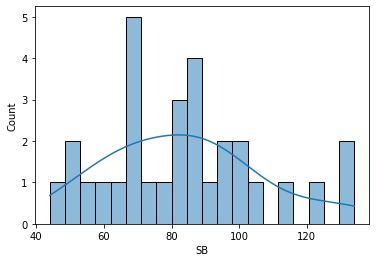

In [47]:
sns.histplot(x='SB',data=df,bins=20,kde=True)
plt.show()

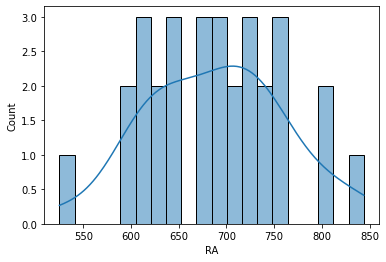

In [46]:
sns.histplot(x='RA',data=df,bins=20,kde=True)
plt.show()

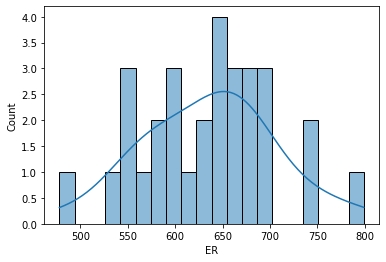

In [45]:
sns.histplot(x='ER',data=df,bins=20,kde=True)
plt.show()

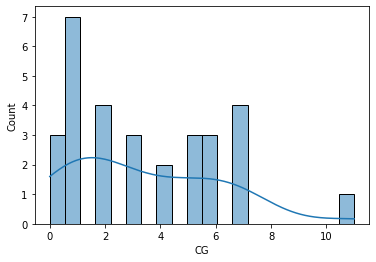

In [44]:
sns.histplot(x='CG',data=df,bins=20,kde=True)
plt.show()

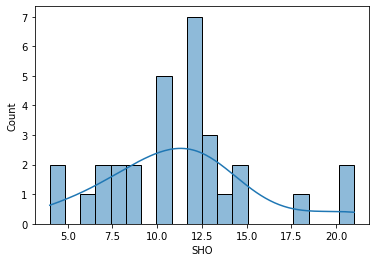

In [43]:
sns.histplot(x='SHO',data=df,bins=20,kde=True)
plt.show()

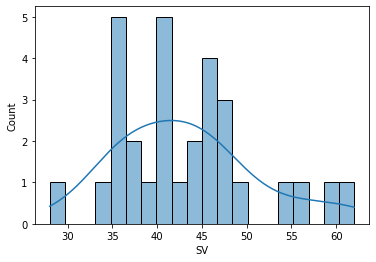

In [42]:
sns.histplot(x='SV',data=df,bins=20,kde=True)
plt.show()

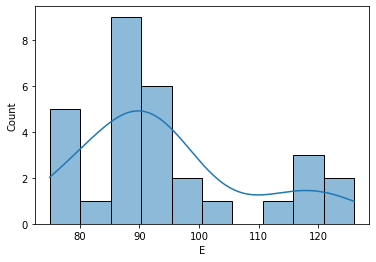

In [40]:
sns.histplot(x='E',data=df,bins=10,kde=True)
plt.show()

<AxesSubplot:xlabel='ERA', ylabel='Count'>

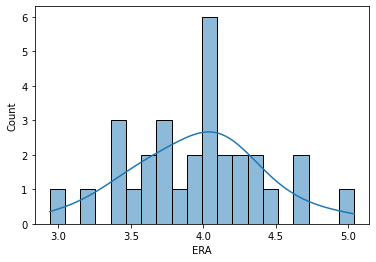

In [39]:
sns.histplot(x='ERA',data=df,bins=20,kde=True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='W', ylabel='Density'>

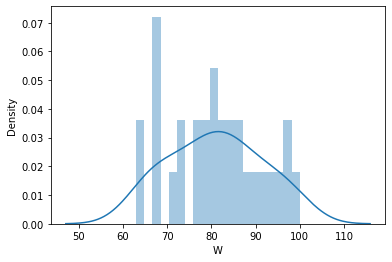

In [58]:
sns.distplot(df['W'],bins=20,kde=True)

Since data has no string values we will not use any encoder and move to further pipelines.

# Describing datasets

In [61]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<AxesSubplot:>

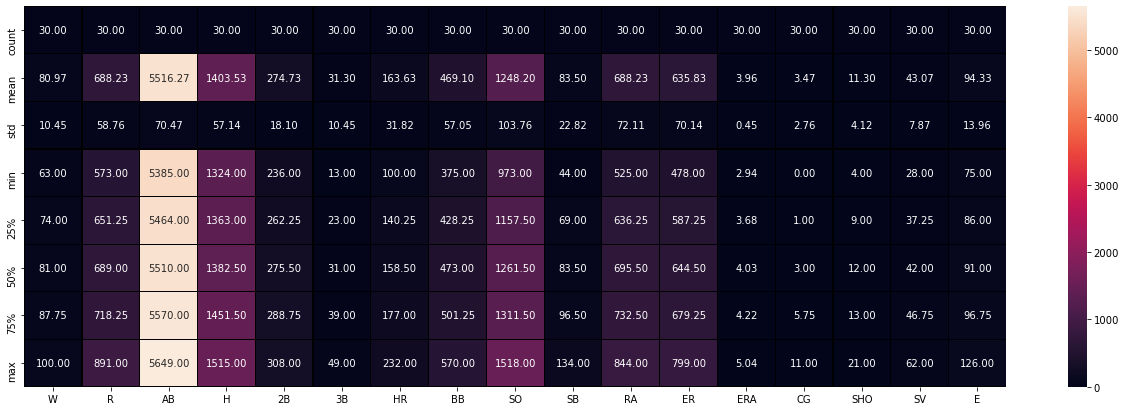

In [62]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.1,linecolor='black',fmt='0.2f')

Correlation of the column with the target column

In [63]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

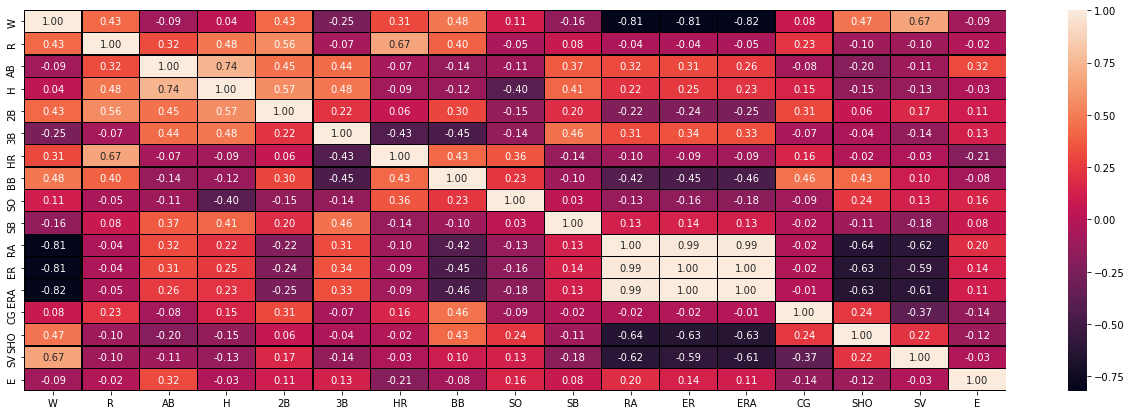

In [65]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor='black',fmt='0.2f')

checking the positives and negative corellation

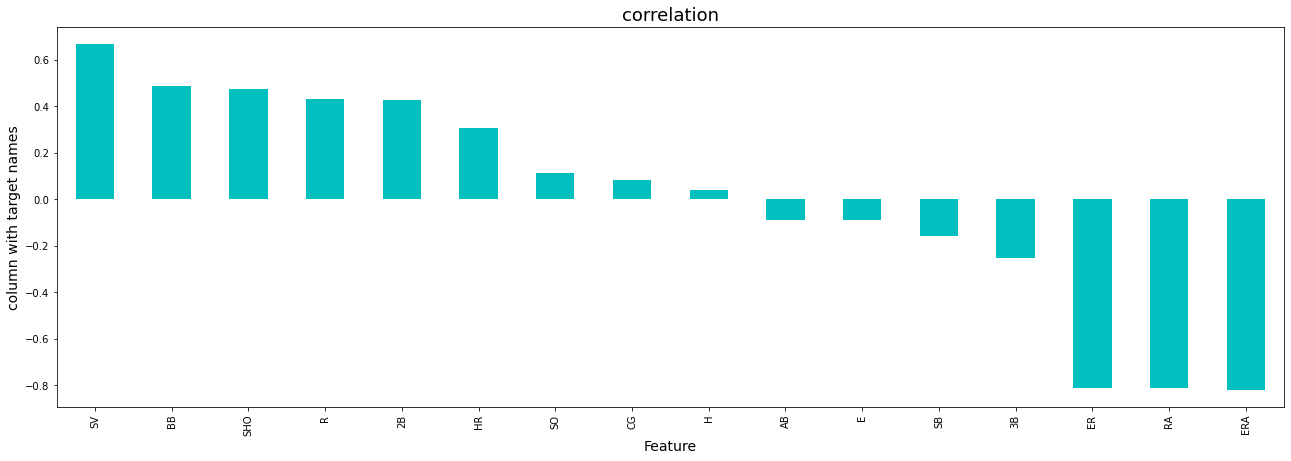

In [66]:
plt.figure(figsize=(22,7))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [67]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

keeping +/-0.5 as the range for skewness

# outliers checking

In [69]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

<AxesSubplot:>

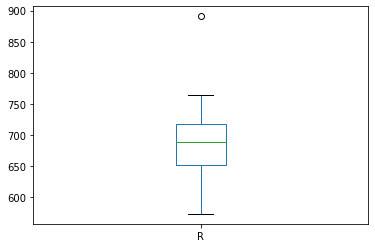

In [70]:
df['R'].plot.box()

<AxesSubplot:>

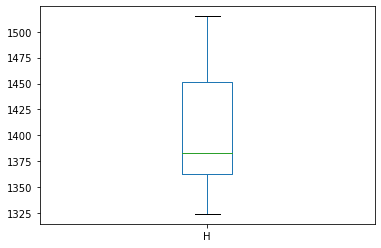

In [71]:
df['H'].plot.box()

<AxesSubplot:>

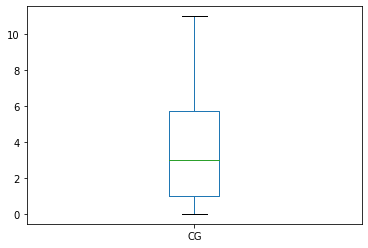

In [72]:
df['CG'].plot.box()

<AxesSubplot:>

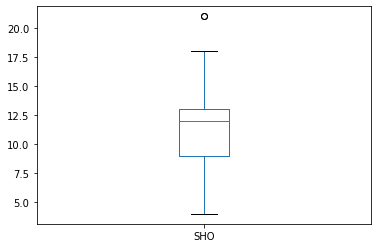

In [73]:
df['SHO'].plot.box()

<AxesSubplot:>

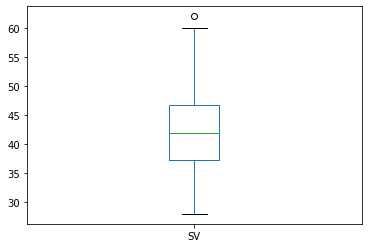

In [74]:
df['SV'].plot.box()

<AxesSubplot:>

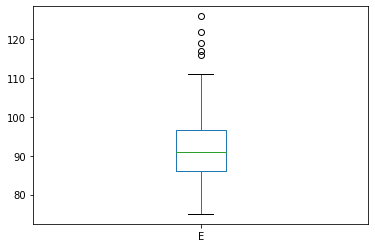

In [75]:
df['E'].plot.box()

# Considering the outlier removal

In [76]:
df.shape

(30, 17)

In [77]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([5]), array([1]))

In [79]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [81]:
df_new_z.shape

(29, 17)

percentage loss of data

In [83]:
data_loss=((30-29)/30)*100
data_loss

3.3333333333333335

# separating the columns into x and y

In [84]:
x=df.drop('W',axis=1)
y=df['W']

# Scaling the data using min-max scaling

In [86]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [88]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state{i},the training accuracy is :- {r2_score(y_train,pred_train)}')
    print(f'At random state{i},the training accuracy is :- {r2_score(y_test,pred_test)}')
    print('\n')

At random state0,the training accuracy is :- 0.9609590618835543
At random state0,the training accuracy is :- 0.6629341689506705


At random state1,the training accuracy is :- 0.9715846357165405
At random state1,the training accuracy is :- 0.3841724690075786


At random state2,the training accuracy is :- 0.9898192153844548
At random state2,the training accuracy is :- -2.081998955010787


At random state3,the training accuracy is :- 0.9722553885185528
At random state3,the training accuracy is :- 0.4618378970602377


At random state4,the training accuracy is :- 0.964746149799658
At random state4,the training accuracy is :- 0.4660685292728437


At random state5,the training accuracy is :- 0.9503092887369992
At random state5,the training accuracy is :- 0.7517105066858546


At random state6,the training accuracy is :- 0.948947004521447
At random state6,the training accuracy is :- 0.8376419521868339


At random state7,the training accuracy is :- 0.9631978535911326
At random state7,the trainin

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=99)

In [90]:
# at random state 99 we have the best accuracy

In [91]:
lr.fit(x_train,y_train)

LinearRegression()

In [92]:
pred_test=lr.predict(x_test)

In [93]:
pred_test

array([66.06511333, 57.38812847, 95.98688215, 80.22254652, 86.15395111,
       84.29029489])

In [94]:
print(r2_score(y_test,pred_test))

0.8804448045510347


# Cross-Validation of the model

In [95]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range (2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f' At cross fold{j} the cv score is {cv_mean} and the accuracy score for training is {Train_accuracy} and the accuracy score testing is {Test_accuracy}' )
    print('\n')

 At cross fold2 the cv score is -1.057932205834568 and the accuracy score for training is 0.9531948414942486 and the accuracy score testing is 0.8804448045510347


 At cross fold3 the cv score is 0.2258846016774 and the accuracy score for training is 0.9531948414942486 and the accuracy score testing is 0.8804448045510347


 At cross fold4 the cv score is 0.24952166654368527 and the accuracy score for training is 0.9531948414942486 and the accuracy score testing is 0.8804448045510347


 At cross fold5 the cv score is 0.04075540667465847 and the accuracy score for training is 0.9531948414942486 and the accuracy score testing is 0.8804448045510347


 At cross fold6 the cv score is 0.2515353093720216 and the accuracy score for training is 0.9531948414942486 and the accuracy score testing is 0.8804448045510347


 At cross fold7 the cv score is 0.3890804644289939 and the accuracy score for training is 0.9531948414942486 and the accuracy score testing is 0.8804448045510347


 At cross fold8 t

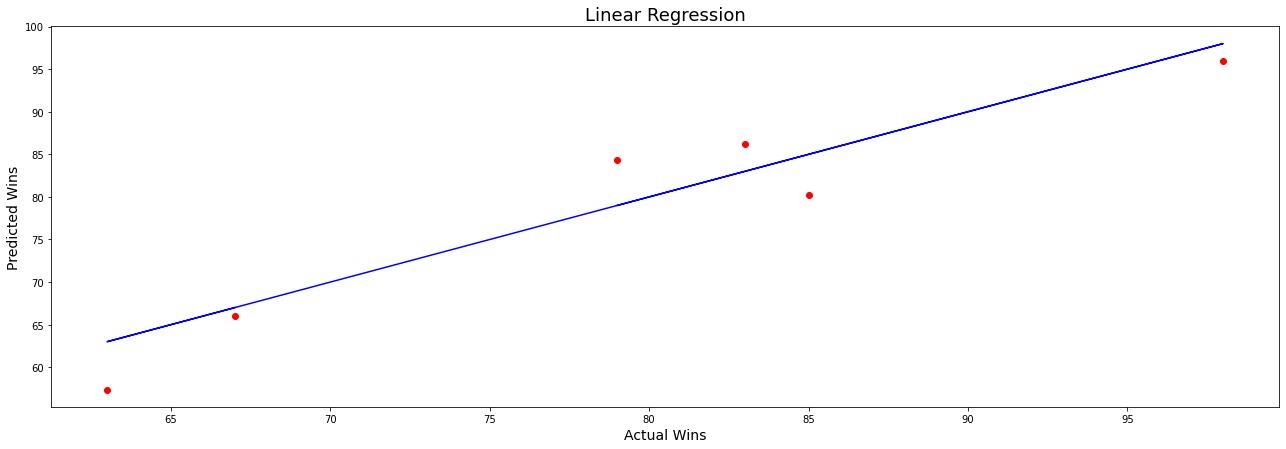

In [96]:
plt.figure(figsize=(22,7))
plt.scatter(x=y_test,y=pred_test,color='red')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Wins',fontsize=14)
plt.ylabel('Predicted Wins',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [99]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [100]:
ls=Lasso(alpha=10, random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.882093327595003

In [101]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.4379000482583654

# Ensemble technique

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [103]:
rf=RandomForestRegressor(criterion='mae',max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)


rfs=r2_score(y_test,pred_decision)
print('R2 score :',rfs*100)

rfscore= cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score :',rfc*100)

R2 score : 76.13451712118108
Cross Val Score : -52.14550733701054


# Saving the Model:

In [104]:
import pickle
filename='Baseball.pk1'
pickle.dump(rf, open(filename,'wb'))

# Conclusion:

In [105]:
loaded_model=pickle.load(open('Baseball.pk1','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.7613451712118108


In [106]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5
Predicted,74.19,69.92,89.54,81.28,85.79,77.9
Original,74.19,69.92,89.54,81.28,85.79,77.9
